# GEM Data Hackathon - Data Exploration

This notebook loads and explores the GEM data for the Butler Institute Hackathon 2025.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Make plots larger and more readable
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Load and Examine the Data

The data has already been processed with R, with numeric codes converted to readable labels, and missing values properly handled.

In [2]:
# Load the data
data = pd.read_csv("Hackathon_GEM_Data_FULL.csv")

# Display basic info about the dataset
print(f"Dataset shape: {data.shape} (rows, columns)")
print("\nBasic dataset information:")
data.info()

Dataset shape: (15868, 36) (rows, columns)

Basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15868 entries, 0 to 15867
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   weight                                   15868 non-null  float64
 1   new_entrepreneur                         15868 non-null  object 
 2   established_entrepreneur                 15868 non-null  object 
 3   knows_entrepreneur                       15761 non-null  object 
 4   local_opportunity                        13316 non-null  object 
 5   entrepreneurial_skill                    14795 non-null  object 
 6   fear_of_failure                          15120 non-null  object 
 7   wants_entrepreneurship                   12070 non-null  object 
 8   respects_entrepreneurship                12082 non-null  object 
 9   follows_entrepreneurship                 1241

In [3]:
# Display the first few rows to understand the data structure
data.head()

,weight,new_entrepreneur,established_entrepreneur,knows_entrepreneur,local_opportunity,entrepreneurial_skill,fear_of_failure,wants_entrepreneurship,respects_entrepreneurship,follows_entrepreneurship,...,new_entrepreneur_owners,new_entrepreneur_external_sales,established_entrepreneur_external_sales,new_entrepreneur_innovation,year,new_entrepreneur_local_innovation,new_entrepreneur_employees,established_entrepreneur_employees,race,region
0,0.674020,No,No,No,No,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
1,0.674020,No,No,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
2,0.814409,No,Yes,No,No,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,1.0,White,Great Lakes
3,1.289586,No,No,No,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Great Lakes
4,0.963587,No,No,No,NaN,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Southeast


## 2. Data Type Conversion

Let's convert appropriate columns to their proper data types for analysis:

In [4]:
# Make a copy of the dataset to work with
df = data.copy()

# Convert yes/no columns to categorical data type
yes_no_columns = [
    'new_entrepreneur', 'established_entrepreneur', 'knows_entrepreneur',
    'local_opportunity', 'entrepreneurial_skill', 'fear_of_failure',
    'future_startup', 'discontinued_business', 'is_investor'
]

for col in yes_no_columns:
    if col in df.columns:
        df[col] = pd.Categorical(df[col])

# Convert other categorical columns
categorical_columns = [
    'gender', 'age_range', 'household_income', 'education',
    'new_entrepreneur_industry', 'established_entrepreneur_industry',
    'new_entrepreneur_innovation', 'new_entrepreneur_local_innovation',
    'race', 'region', 'discontinued_business_continuation',
    'investment', 'investment_relationship',
    'wants_entrepreneurship', 'respects_entrepreneurship', 'follows_entrepreneurship'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = pd.Categorical(df[col])

# Convert year to integer
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['year'] = df['year'].astype('Int64')  # nullable integer type
    
# Convert numeric columns to appropriate types
numeric_columns = [
    'weight', 'household_size', 'new_entrepreneur_new_jobs',
    'established_entrepreneur_new_jobs', 'established_entrepreneur_owners',
    'new_entrepreneur_owners', 'new_entrepreneur_employees',
    'established_entrepreneur_employees'
]

for col in numeric_columns:
    if col in df.columns:
        # Use 'coerce' to handle non-numeric values by setting them to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types after conversion
df.dtypes

weight                                      float64
new_entrepreneur                           category
established_entrepreneur                   category
knows_entrepreneur                         category
local_opportunity                          category
entrepreneurial_skill                      category
fear_of_failure                            category
wants_entrepreneurship                     category
respects_entrepreneurship                  category
follows_entrepreneurship                   category
future_startup                             category
discontinued_business                      category
discontinued_business_continuation         category
is_investor                                category
investment                                 category
investment_relationship                    category
gender                                     category
age_range                                  category
household_size                              float64
household_in

## 3. Explore Missing Data

In [5]:
# Calculate missing value percentages
missing_percentages = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

# Display missing percentages for all variables
print("Missing value percentages by column:")
pd.DataFrame({
    'Column': missing_percentages.index,
    'Missing %': missing_percentages.values
}).set_index('Column')

Missing value percentages by column:


,Missing %
Column,
established_entrepreneur_external_sales,100.000000
investment,99.401311
new_entrepreneur_local_innovation,96.659945
new_entrepreneur_innovation,96.054953
discontinued_business_continuation,95.380640
new_entrepreneur_employees,93.742123
investment_relationship,93.168641
new_entrepreneur_external_sales,92.670784
established_entrepreneur_new_jobs,91.523822


/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_34697/3850389096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=high_missing.index, y=high_missing.values, palette='viridis')


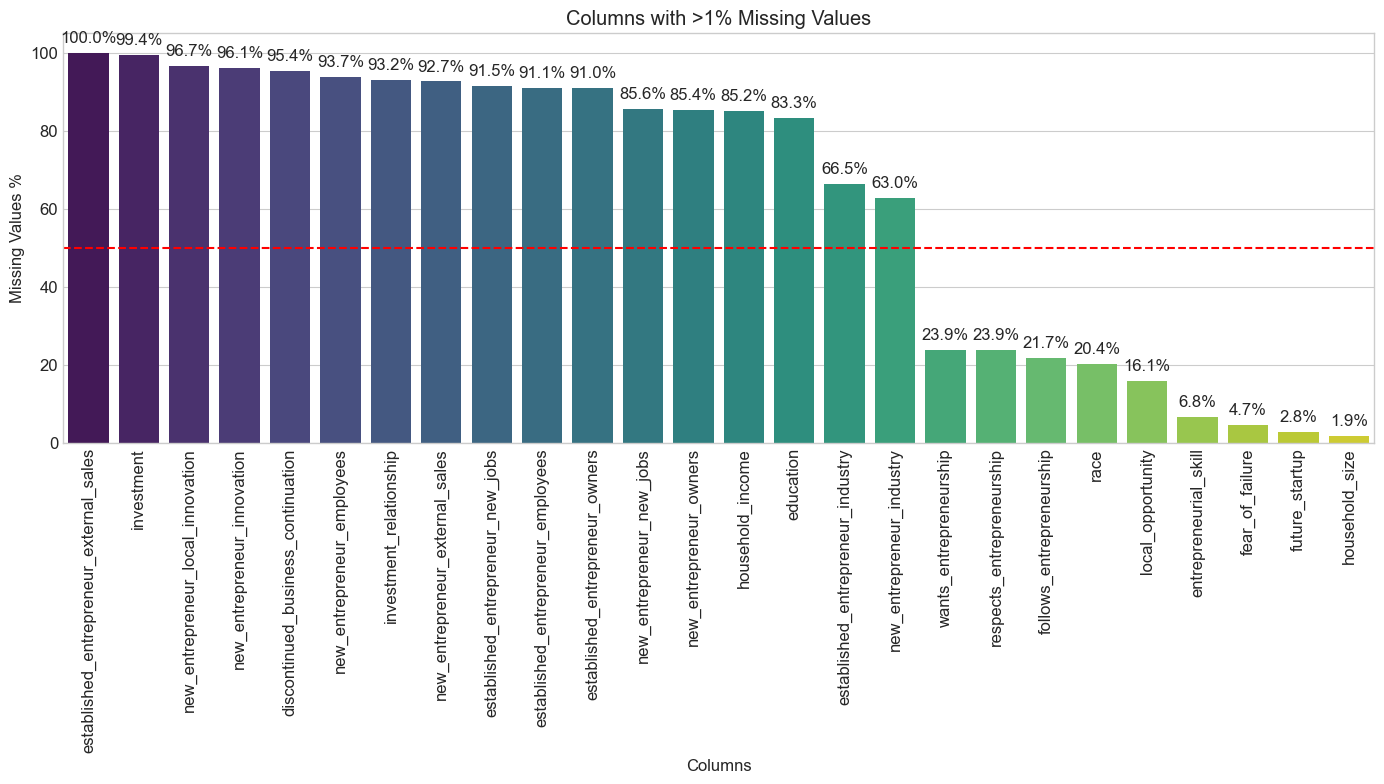

In [6]:
# Visualize the missing data for columns with at least 1% missing values
high_missing = missing_percentages[missing_percentages > 1]
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=high_missing.index, y=high_missing.values, palette='viridis')
plt.xlabel('Columns')
plt.ylabel('Missing Values %')
plt.title('Columns with >1% Missing Values')
plt.xticks(rotation=90)
plt.axhline(y=50, color='red', linestyle='--')  # Visual reference at 50%

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom',
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 4. Basic Descriptive Statistics

In [7]:
# Numeric variable summary statistics
df.describe()

,weight,household_size,new_entrepreneur_new_jobs,established_entrepreneur_new_jobs,established_entrepreneur_owners,new_entrepreneur_owners,established_entrepreneur_external_sales,year,new_entrepreneur_employees,established_entrepreneur_employees
count,15868.000000,15563.000000,2281.000000,1345.000000,1433.000000,2311.000000,0.0,15868.0,993.000000,1409.000000
mean,1.000000,3.074986,20.522578,4.689963,7.335659,1.912592,NaN,2017.771238,26.407855,264.342087
std,0.263309,1.785134,125.328822,86.317338,74.421444,1.597664,NaN,1.953025,293.468578,5970.696568
min,0.403103,1.000000,-274.000000,-1950.000000,1.000000,1.000000,NaN,2015.0,-2.000000,-2.000000
25%,0.825600,2.000000,0.000000,0.000000,1.000000,1.000000,NaN,2016.0,0.000000,0.000000
50%,0.971805,3.000000,3.000000,0.000000,1.000000,1.000000,NaN,2018.0,1.000000,2.000000
75%,1.123036,4.000000,10.000000,2.000000,2.000000,2.000000,NaN,2019.0,4.000000,6.000000
max,4.924399,44.000000,2000.000000,1500.000000,1000.000000,10.000000,NaN,2021.0,6000.000000,200000.000000


In [8]:
# Categorical variable summary - key entrepreneurship variables
print("New Entrepreneurs (TEA):")
print(df['new_entrepreneur'].value_counts(dropna=False))
print(f"Percentage: {df['new_entrepreneur'].value_counts(normalize=True)['Yes']*100:.2f}%\n")

print("Established Business Owners:")
print(df['established_entrepreneur'].value_counts(dropna=False))
print(f"Percentage: {df['established_entrepreneur'].value_counts(normalize=True)['Yes']*100:.2f}%")

New Entrepreneurs (TEA):
new_entrepreneur
No     13557
Yes     2311
Name: count, dtype: int64
Percentage: 14.56%

Established Business Owners:
established_entrepreneur
No     14435
Yes     1433
Name: count, dtype: int64
Percentage: 9.03%


## 5. Explore Entrepreneurship by Demographic Variables

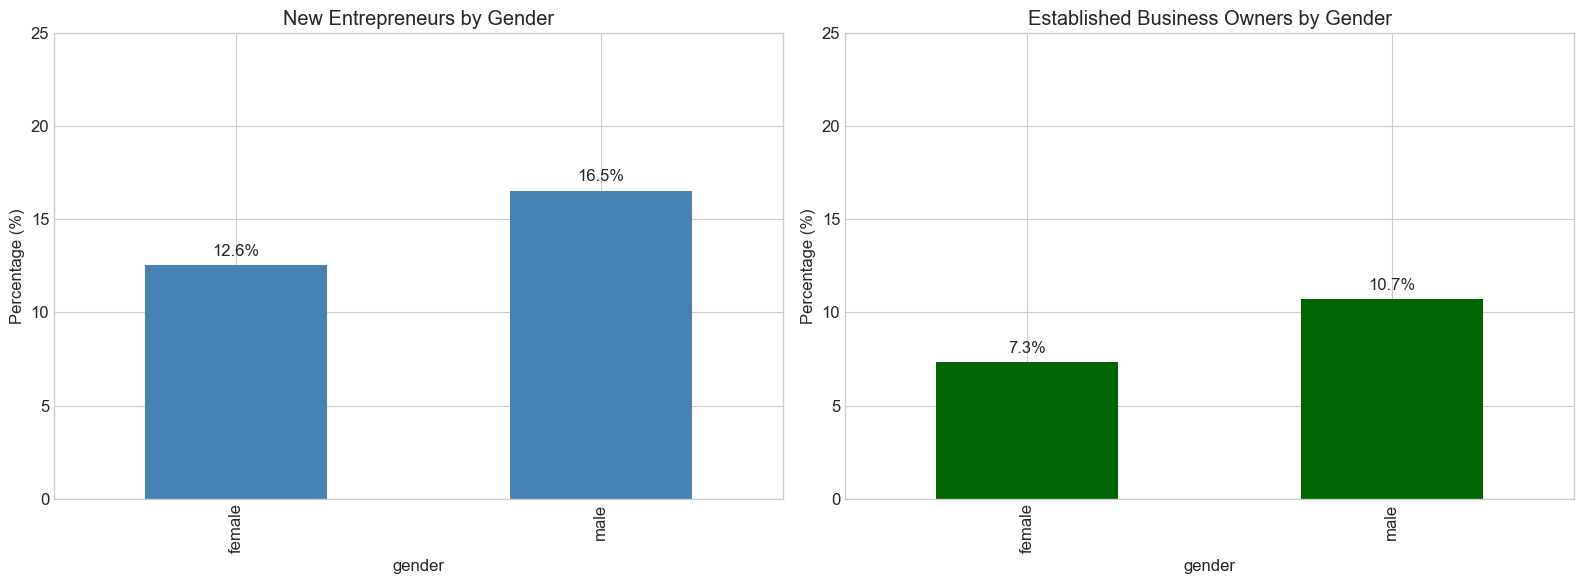

In [9]:
# Entrepreneurship by gender
gender_tea = pd.crosstab(df['gender'], df['new_entrepreneur'], normalize='index') * 100
gender_eb = pd.crosstab(df['gender'], df['established_entrepreneur'], normalize='index') * 100

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot new entrepreneurs by gender
gender_tea['Yes'].plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('New Entrepreneurs by Gender')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_ylim(0, 25)  # Adjust as needed based on data
for i, v in enumerate(gender_tea['Yes']):
    ax[0].text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Plot established business owners by gender
gender_eb['Yes'].plot(kind='bar', ax=ax[1], color='darkgreen')
ax[1].set_title('Established Business Owners by Gender')
ax[1].set_ylabel('Percentage (%)')
ax[1].set_ylim(0, 25)  # Adjust as needed based on data
for i, v in enumerate(gender_eb['Yes']):
    ax[1].text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

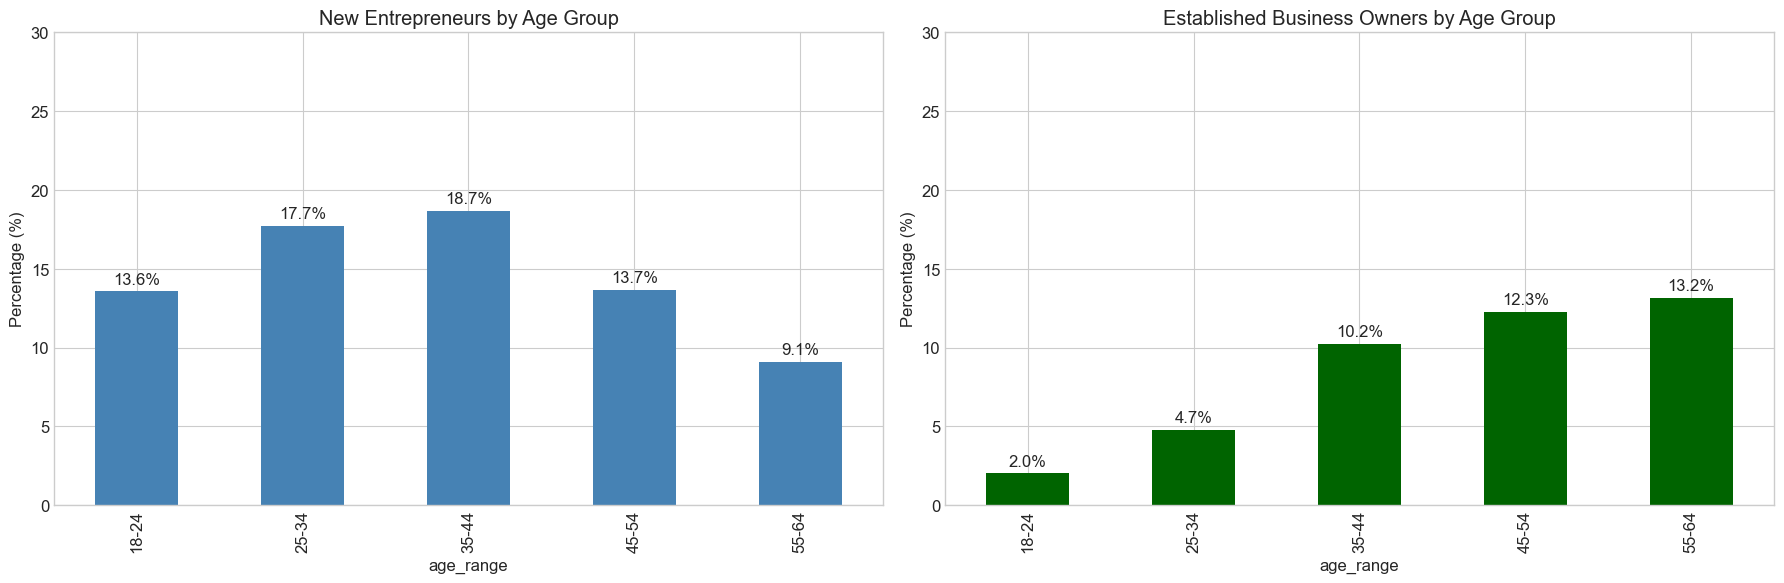

In [10]:
# Entrepreneurship by age range
age_tea = pd.crosstab(df['age_range'], df['new_entrepreneur'], normalize='index') * 100
age_eb = pd.crosstab(df['age_range'], df['established_entrepreneur'], normalize='index') * 100

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot new entrepreneurs by age
age_tea['Yes'].plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('New Entrepreneurs by Age Group')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_ylim(0, 30)  # Adjust as needed based on data
for i, v in enumerate(age_tea['Yes']):
    ax[0].text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Plot established business owners by age
age_eb['Yes'].plot(kind='bar', ax=ax[1], color='darkgreen')
ax[1].set_title('Established Business Owners by Age Group')
ax[1].set_ylabel('Percentage (%)')
ax[1].set_ylim(0, 30)  # Adjust as needed based on data
for i, v in enumerate(age_eb['Yes']):
    ax[1].text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

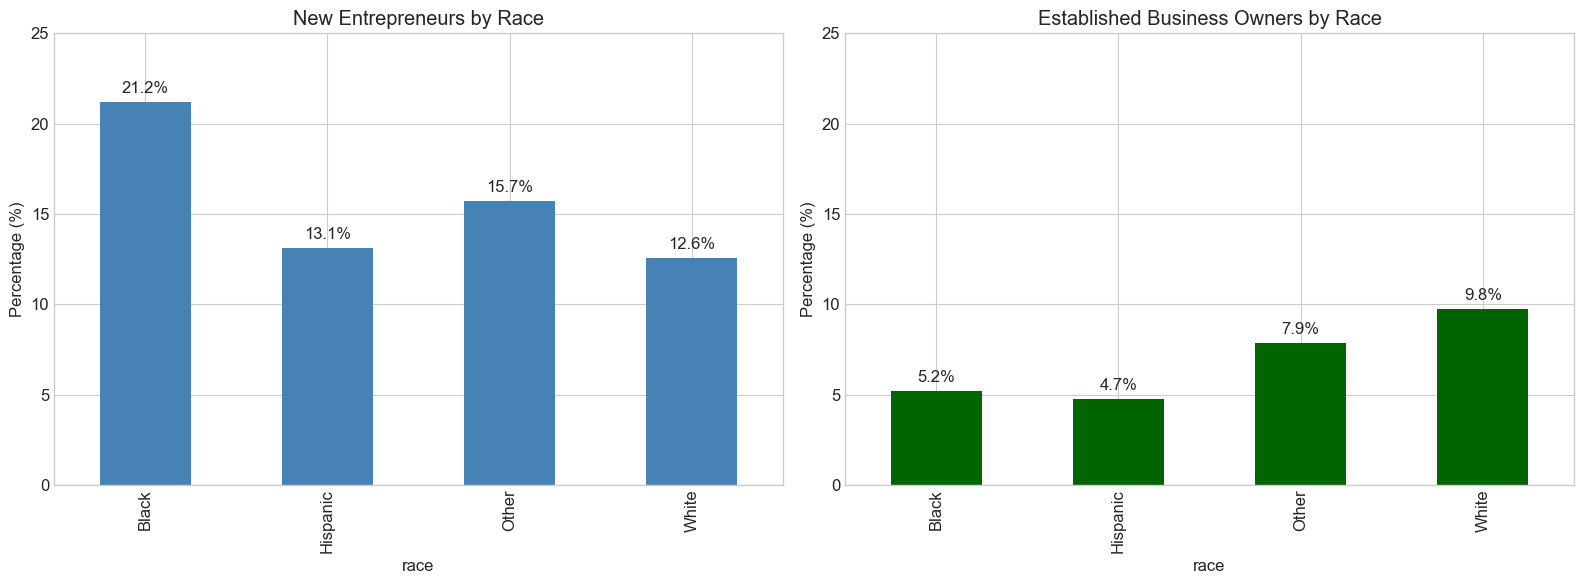

In [11]:
# Entrepreneurship by race
race_tea = pd.crosstab(df['race'], df['new_entrepreneur'], normalize='index') * 100
race_eb = pd.crosstab(df['race'], df['established_entrepreneur'], normalize='index') * 100

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot new entrepreneurs by race
race_tea['Yes'].plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('New Entrepreneurs by Race')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_ylim(0, 25)  # Adjust as needed based on data
for i, v in enumerate(race_tea['Yes']):
    ax[0].text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Plot established business owners by race
race_eb['Yes'].plot(kind='bar', ax=ax[1], color='darkgreen')
ax[1].set_title('Established Business Owners by Race')
ax[1].set_ylabel('Percentage (%)')
ax[1].set_ylim(0, 25)  # Adjust as needed based on data
for i, v in enumerate(race_eb['Yes']):
    ax[1].text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

## 6. Entrepreneurship Trends Over Time

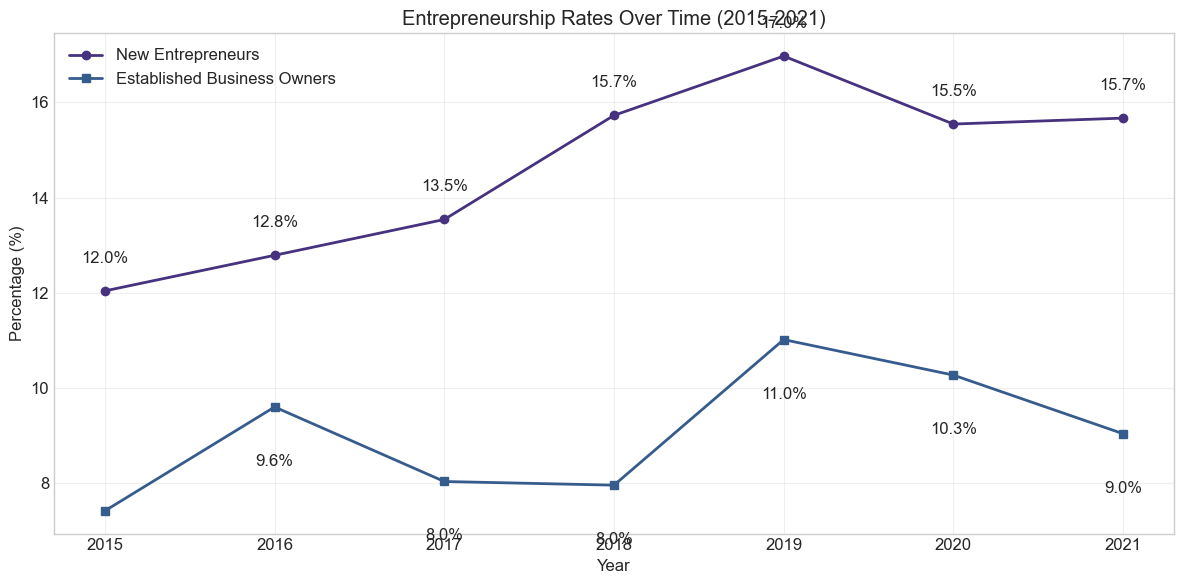

In [12]:
# Calculate entrepreneurship rates by year
year_tea = pd.crosstab(df['year'], df['new_entrepreneur'], normalize='index') * 100
year_eb = pd.crosstab(df['year'], df['established_entrepreneur'], normalize='index') * 100

plt.figure(figsize=(12, 6))
plt.plot(year_tea.index, year_tea['Yes'], marker='o', linewidth=2, label='New Entrepreneurs')
plt.plot(year_eb.index, year_eb['Yes'], marker='s', linewidth=2, label='Established Business Owners')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Entrepreneurship Rates Over Time (2015-2021)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(year_tea.index)

# Add percentage labels
for i, (tea_val, eb_val) in enumerate(zip(year_tea['Yes'], year_eb['Yes'])):
    plt.annotate(f'{tea_val:.1f}%', (year_tea.index[i], tea_val + 0.3), textcoords="offset points", 
                 xytext=(0,10), ha='center')
    plt.annotate(f'{eb_val:.1f}%', (year_eb.index[i], eb_val - 0.8), textcoords="offset points", 
                 xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

## 7. Factors Associated with Entrepreneurship

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_34697/3931013780.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.index, y=crosstab['Yes'], ax=axes[i], palette='Blues_r')
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_34697/3931013780.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.index, y=crosstab['Yes'], ax=axes[i], palette='Blues_r')
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_34697/3931013780.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crosstab.index, y=cros

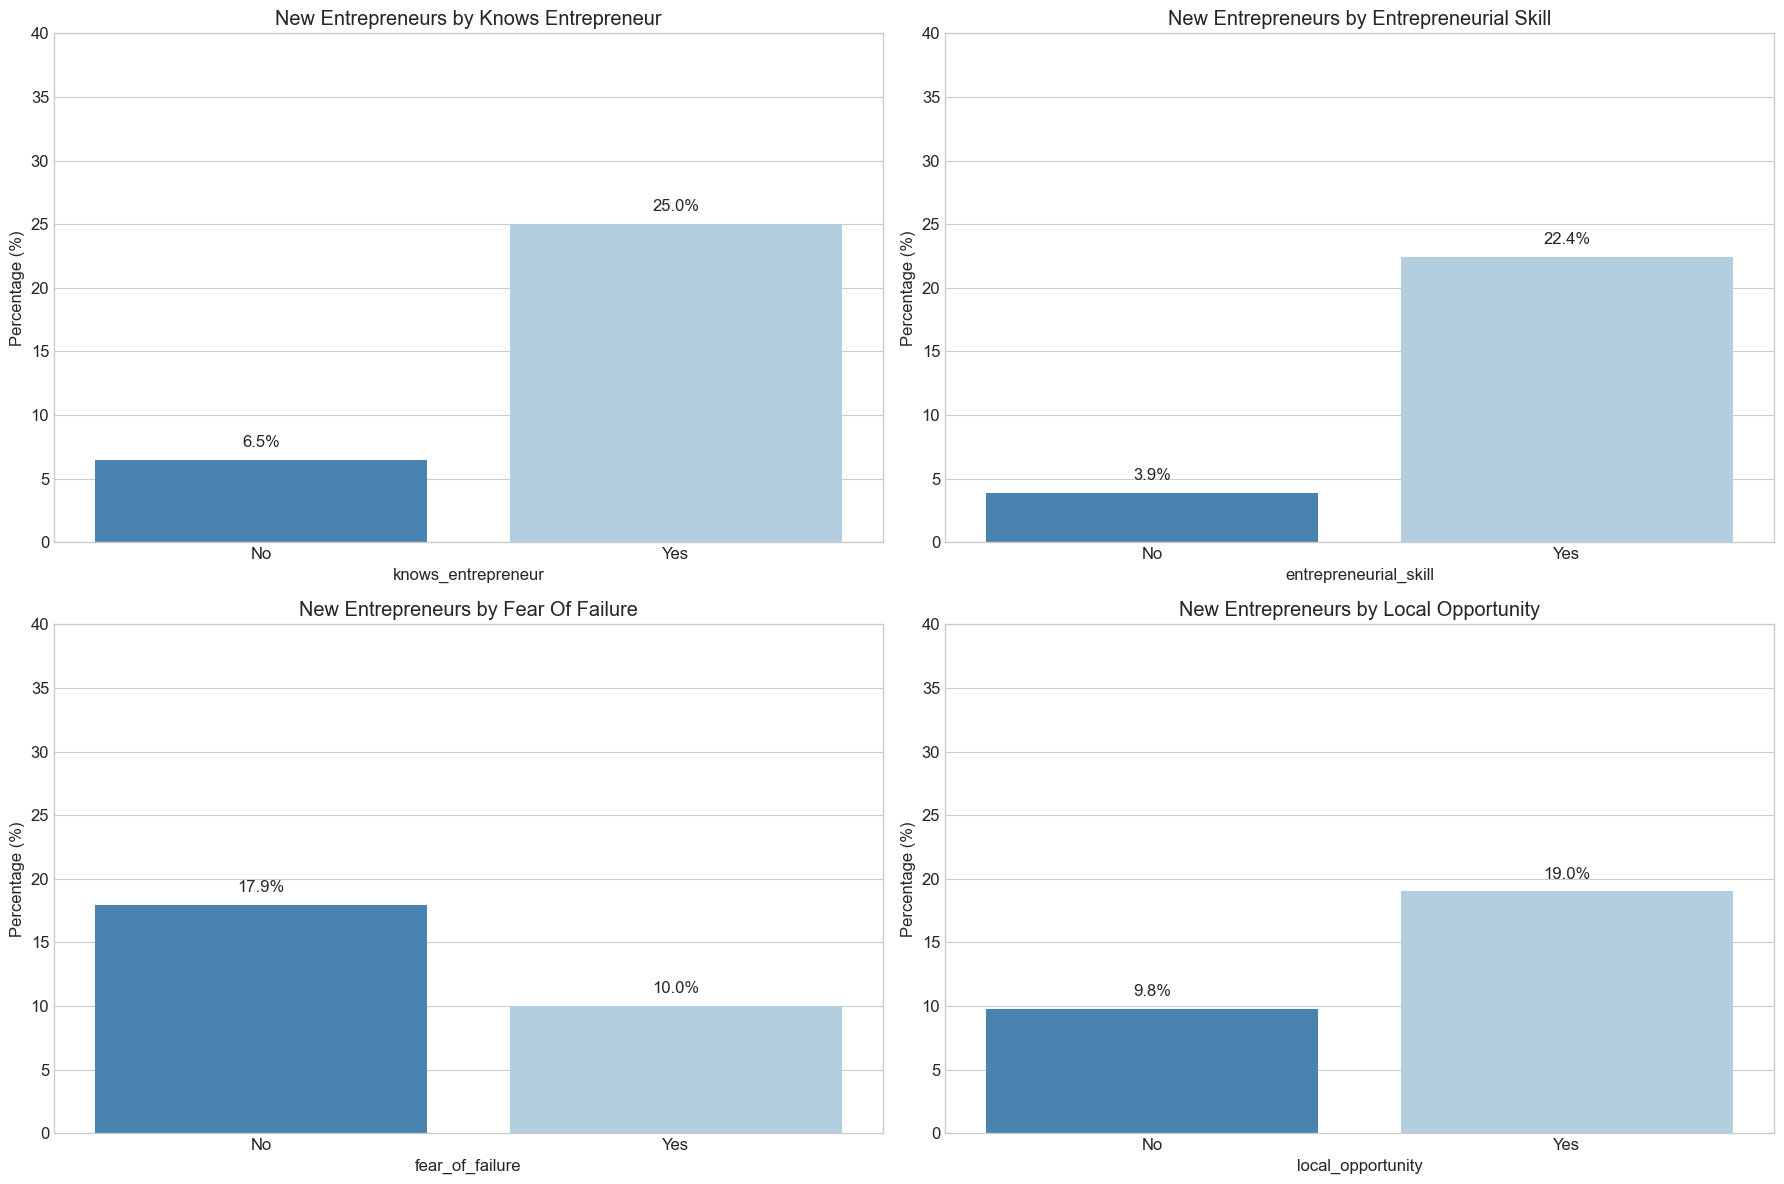

In [13]:
# Define factors to explore
factors = ['knows_entrepreneur', 'entrepreneurial_skill', 'fear_of_failure', 'local_opportunity']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, factor in enumerate(factors):
    # Calculate percentage of entrepreneurs by factor
    crosstab = pd.crosstab(df[factor], df['new_entrepreneur'], normalize='index') * 100
    
    # Create the plot
    sns.barplot(x=crosstab.index, y=crosstab['Yes'], ax=axes[i], palette='Blues_r')
    axes[i].set_title(f'New Entrepreneurs by {factor.replace("_", " ").title()}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 40)  # Adjust as needed
    
    # Add value labels
    for j, v in enumerate(crosstab['Yes']):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

## 8. Regional Patterns of Entrepreneurship

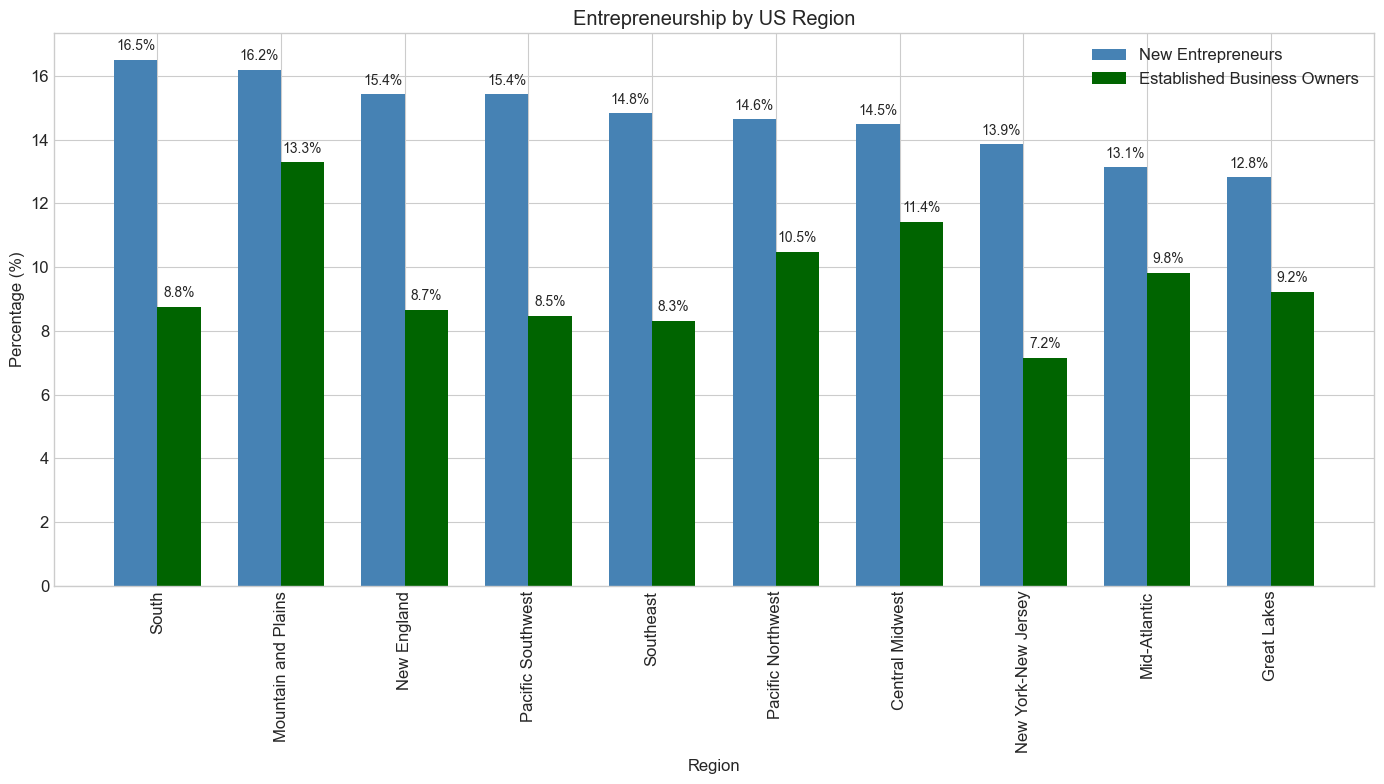

In [14]:
# Calculate entrepreneurship rates by region
region_tea = pd.crosstab(df['region'], df['new_entrepreneur'], normalize='index') * 100
region_eb = pd.crosstab(df['region'], df['established_entrepreneur'], normalize='index') * 100

# Sort by new entrepreneur percentage
region_tea = region_tea.sort_values('Yes', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(region_tea.index))
plt.bar(index, region_tea['Yes'], bar_width, label='New Entrepreneurs', color='steelblue')
plt.bar(index + bar_width, region_eb.loc[region_tea.index]['Yes'], bar_width, label='Established Business Owners', color='darkgreen')

plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Entrepreneurship by US Region')
plt.xticks(index + bar_width / 2, region_tea.index, rotation=90)
plt.legend()

# Add percentage labels
for i, v in enumerate(region_tea['Yes']):
    plt.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)
    
for i, v in enumerate(region_eb.loc[region_tea.index]['Yes']):
    plt.text(i + bar_width, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 9. Industry Distribution of Entrepreneurs (if available in the data)

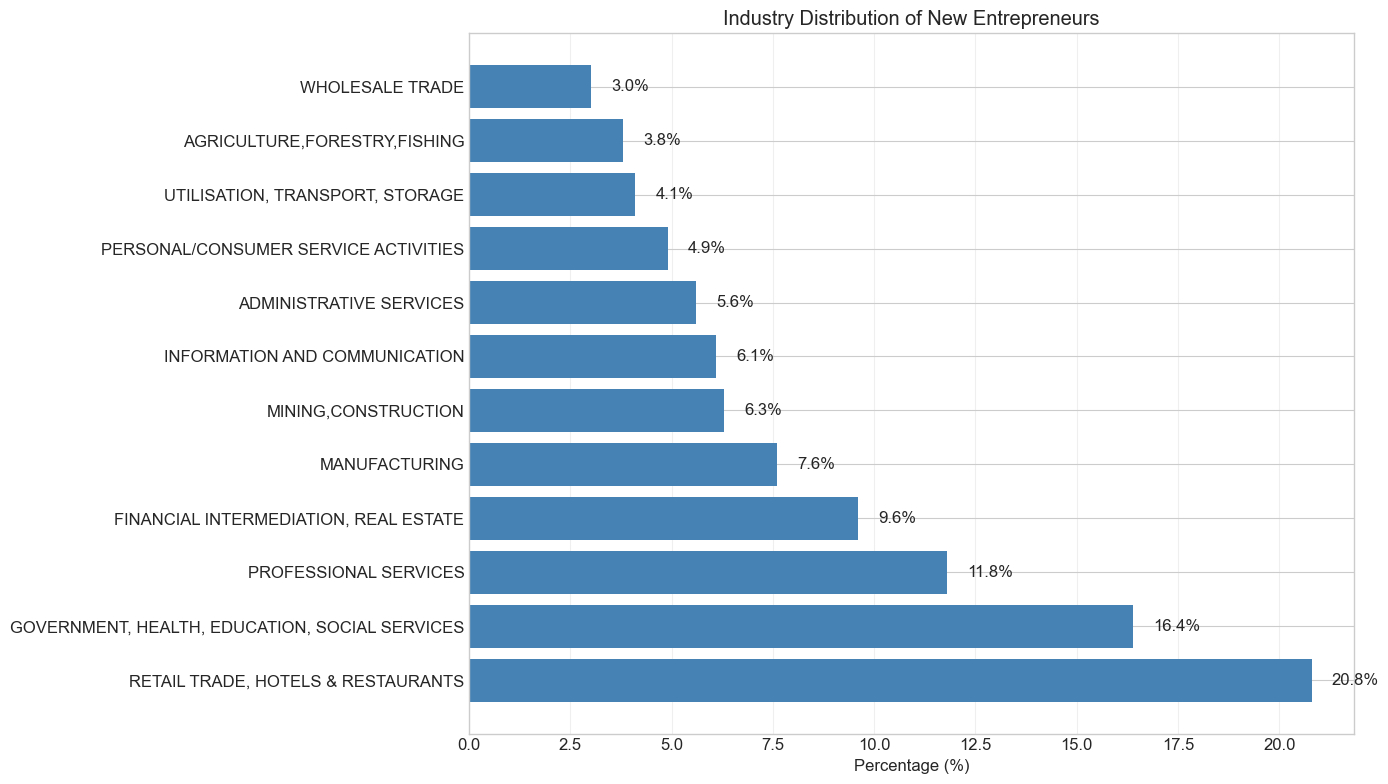

In [15]:
# Check if we have industry data
if 'new_entrepreneur_industry' in df.columns and df['new_entrepreneur_industry'].notna().sum() > 0:
    # Industry distribution for new entrepreneurs
    # First, filter to only new entrepreneurs
    new_entrepreneurs = df[df['new_entrepreneur'] == 'Yes']
    
    # Count industries and sort by frequency
    industry_counts = new_entrepreneurs['new_entrepreneur_industry'].value_counts().sort_values(ascending=False)
    # Filter out NaN and NOT CLASSIFIED/MISSING if present
    if 'NOT CLASSIFIED/MISSING' in industry_counts.index:
        industry_counts = industry_counts[industry_counts.index != 'NOT CLASSIFIED/MISSING']
    
    # Calculate percentages
    industry_pct = (industry_counts / industry_counts.sum() * 100).round(1)
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.barh(industry_pct.index, industry_pct, color='steelblue')
    plt.xlabel('Percentage (%)')
    plt.title('Industry Distribution of New Entrepreneurs')
    plt.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width}%',
                ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("Industry data not available or completely missing in this dataset.")

## 10. Export Cleaned Dataset for Further Analysis

In [ ]:
# Save the processed dataframe to a new CSV file
df.to_csv('GEM_Data_Processed.csv', index=False)
print("Processed data saved to 'GEM_Data_Processed.csv'")